In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import seaborn as sns
from scipy import stats
import networkx as nx
import pandas as pd
from collections import Counter

In [2]:
T2d = hfsp.create_tissue("../inputs/2d_sam.csv", True)
T3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)

In [3]:
node_deg = dict(T3d.degree(list(T3d.nodes())))

In [4]:
for key, value in dict(node_deg).items():
    if value >= 8:
        del node_deg[key]
nodes_to_drop = [str(x) for x in list(node_deg.keys())]

In [5]:
temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch_4wCW_with2hW = np.array([22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,12])


# These values are estimated by fitting FT1 gene expression data to 3D template.

p_decay = 0.00004
p_cold = 0.0004
p_warm = 0.015
p_edge = 0.05

In [24]:
#for modified 3D
g = T3d
hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.zeros(len(g.edges()), dtype = int)))) # setting the network state to default.
df = hfsp.trajectory(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, rule_code_node = [1,0.5], rule_code_edge = 0)

df = df.drop(df.iloc[:, len(g.nodes())+3 :],  axis=1)
df = df.drop(nodes_to_drop, axis=1)

active_bulk_nodes = []

for i in range(len(df)):
    active_bulk_nodes.append(np.sum(df.iloc[i,3:])*100/728)
    
df["% of active bulk nodes"] = np.array(active_bulk_nodes)

ensemble_df["sim10"] = df.iloc[:,-1]
ensemble_df

,time,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.137363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.137363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137363,0.137363,0.137363
3,3,0.274725,0.000000,0.000000,0.000000,0.000000,0.137363,0.000000,0.274725,0.137363,0.137363
4,4,0.549451,0.000000,0.137363,0.137363,0.000000,0.137363,0.000000,0.412088,0.274725,0.274725
...,...,...,...,...,...,...,...,...,...,...,...
800,800,10.302198,16.895604,12.500000,11.538462,12.912088,15.247253,11.263736,11.401099,9.752747,14.285714
801,801,10.302198,16.895604,12.637363,11.538462,13.049451,15.247253,11.263736,11.401099,9.890110,14.285714
802,802,10.439560,16.895604,12.637363,11.538462,13.049451,15.247253,11.263736,11.401099,9.890110,14.560440
803,803,10.439560,16.895604,12.637363,11.538462,13.049451,15.384615,11.263736,11.538462,9.890110,14.560440


In [25]:
ensemble_df['mean'] = ensemble_df.iloc[:,1:11].mean(axis=1)
ensemble_df['std'] = ensemble_df.iloc[:,1:11].std(axis=1)
ensemble_df['upper'] = ensemble_df.iloc[:,11] + 1.96*ensemble_df.iloc[:,12]/np.sqrt(10)
ensemble_df['lower'] = ensemble_df.iloc[:,11] - 1.96*ensemble_df.iloc[:,12]/np.sqrt(10)
ensemble_df.to_csv("../outputs/exp_contrasting 3D and modified 3D/df_modified 3D_4wCW, mr1.csv")

In [27]:
# for modified 3D

df_3D_4wC = pd.read_csv("../outputs/exp_contrasting 3D and modified 3D/df_modified 3d_4wC, mr1.csv")
df_3D_4wCW = pd.read_csv("../outputs/exp_contrasting 3D and modified 3D/df_modified 3d_4wCW, mr1.csv")

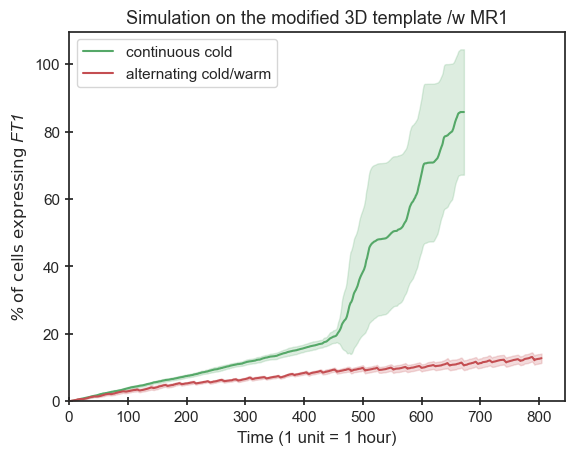

In [32]:
# plot modified 3D

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation on the modified 3D template /w MR1", font = "Arial", fontsize = 13)

ax.plot(df_3D_4wC['time'], df_3D_4wC['mean'], 'g', label='continuous cold')
ax.fill_between(df_3D_4wC['time'], df_3D_4wC['lower'], df_3D_4wC['upper'], color='g', alpha=0.2)

ax.plot(df_3D_4wCW['time'], df_3D_4wCW['mean'], 'r', label='alternating cold/warm')
ax.fill_between(df_3D_4wCW['time'], df_3D_4wCW['lower'], df_3D_4wCW['upper'], color='r', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("../outputs/exp_contrasting 3D and modified 3D/plot_sim on modified 3D, mr1.png", dpi = 600)

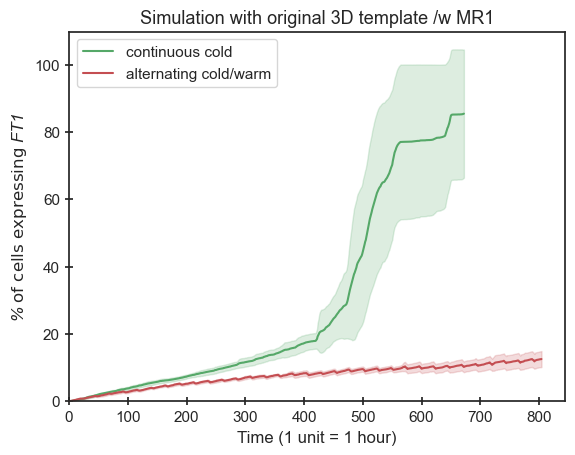

In [31]:
# for 3D (Gwen's template)

g = T3d

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.zeros(len(g.edges()), dtype = int)))) # setting the network state to default.
df_xD_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [1,0.5], rule_code_edge = 0, ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.zeros(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.zeros(len(g.edges()), dtype = int)))) # setting the network state to default.
df_xD_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [1,0.5], rule_code_edge = 0, ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.zeros(len(g.edges()), dtype = int))))


# plot for xD

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with original 3D template /w MR1", font = "Arial", fontsize = 13)

ax.plot(df_xD_4wC['time'], df_xD_4wC['mean'], 'g', label='continuous cold')
ax.fill_between(df_xD_4wC['time'], df_xD_4wC['lower'], df_xD_4wC['upper'], color='g', alpha=0.2)

ax.plot(df_xD_4wCW['time'], df_xD_4wCW['mean'], 'r', label='alternating cold/warm')
ax.fill_between(df_xD_4wCW['time'], df_xD_4wCW['lower'], df_xD_4wCW['upper'], color='r', alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("../outputs/exp_contrasting 3D and modified 3D/plot_sim on 3D, mr1.png", dpi = 600)